<a href="https://colab.research.google.com/github/mcrawf2023/Jeopardy/blob/main/Jeopardy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unstructured Data Analysis
## Jeopardy Questions Dataset
### Jules Capaldo, Peter Christie, Megan Crawford, Clarinsa Djaja

#### Set Up

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [ ]:
jeopardy_1st_half = pd.read_csv("https://raw.githubusercontent.com/peter-christie/uda_jeopardy/main/newer_jeopardy_questions.csv")

In [ ]:
jeopardy_2nd_half = pd.read_csv("https://raw.githubusercontent.com/peter-christie/uda_jeopardy/main/older_jeopardy_questions.csv")

In [ ]:
jeopardy_1st_half.shape

(101210, 8)

In [ ]:
jeopardy_2nd_half.shape

(101325, 8)

In [ ]:
jeopardy = pd.concat([jeopardy_1st_half, jeopardy_2nd_half], ignore_index = True)


In [ ]:
# Clear up memory, data frames no longer needed
del(jeopardy_1st_half)
del(jeopardy_2nd_half)

In [ ]:
jeopardy.shape

(202535, 8)

In [ ]:
jeopardy.head()

,Unnamed: 0,Show.Number,Air.Date,Round,Category,Value,Question,Answer
0,1,5728,7/1/09,Double Jeopardy!,STOCK SYMBOL-IC,$400,ZZ is the snooze of a symbol for this Posturep...,Sealy
1,2,5339,11/22/07,Double Jeopardy!,THE SCIENCE OF LIQUOR,"$1,200",Zymurgy is the chemistry branch that deals wit...,fermentation
2,3,5152,1/23/07,Jeopardy!,LIP GLOSS,"$1,000",Zyderm & Zyplast are types of these injections...,collagen injections
3,4,4648,11/17/04,Double Jeopardy!,TOOLS OF THE TRADE,$400,Zwilling J. A. Henckels will sell the aspiring...,knives
4,5,4564,6/10/04,Double Jeopardy!,JUNE BUGGED,$400,"Zut! On June 22, 1815, 4 days after Waterloo, ...",abdicate


In [ ]:
jeopardy.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [ ]:
jeopardy.head()

,Show.Number,Air.Date,Round,Category,Value,Question,Answer
0,5728,7/1/09,Double Jeopardy!,STOCK SYMBOL-IC,$400,ZZ is the snooze of a symbol for this Posturep...,Sealy
1,5339,11/22/07,Double Jeopardy!,THE SCIENCE OF LIQUOR,"$1,200",Zymurgy is the chemistry branch that deals wit...,fermentation
2,5152,1/23/07,Jeopardy!,LIP GLOSS,"$1,000",Zyderm & Zyplast are types of these injections...,collagen injections
3,4648,11/17/04,Double Jeopardy!,TOOLS OF THE TRADE,$400,Zwilling J. A. Henckels will sell the aspiring...,knives
4,4564,6/10/04,Double Jeopardy!,JUNE BUGGED,$400,"Zut! On June 22, 1815, 4 days after Waterloo, ...",abdicate


In [ ]:
jeopardy['Round'].value_counts()

Jeopardy!           102301
Double Jeopardy!    100234
Name: Round, dtype: int64

In [ ]:
jeopardy.dtypes

Show.Number     int64
Air.Date       object
Round          object
Category       object
Value          object
Question       object
Answer         object
dtype: object

In [ ]:
#jeopardy['Question'] = jeopardy['Question'].apply(word_tokenize)

In [ ]:
%matplotlib inline

#### Top Categories

In [ ]:
category_type = jeopardy['Category'].value_counts()

#category_type

In [ ]:
print("The top ten categories overall are: ")
category_type[0:10]

The top ten categories overall are: 


BEFORE & AFTER             545
LITERATURE                 480
SCIENCE                    469
AMERICAN HISTORY           396
POTPOURRI                  383
WORLD HISTORY              363
HISTORY                    347
COLLEGES & UNIVERSITIES    342
SPORTS                     332
WORD ORIGINS               331
Name: Category, dtype: int64

In [ ]:
category_type_r1 = jeopardy[jeopardy['Round'] == 'Jeopardy!']['Category'].value_counts()

#category_type_r1

In [ ]:
print("The top ten categories for the 'Jeopardy!' round are: ")
category_type_r1[0:10]

The top ten categories for the 'Jeopardy!' round are: 


SPORTS                 252
POTPOURRI              245
STUPID ANSWERS         242
ANIMALS                224
AMERICAN HISTORY       223
STATE CAPITALS         207
SCIENCE                205
TELEVISION             196
U.S. CITIES            192
BUSINESS & INDUSTRY    184
Name: Category, dtype: int64

In [ ]:
category_type_r2 = jeopardy[jeopardy['Round'] == 'Double Jeopardy!']['Category'].value_counts()

#category_type_r2

In [ ]:
print("The top ten categories for the 'Double Jeopardy!' round are: ")
category_type_r2[0:10]

The top ten categories for the 'Double Jeopardy!' round are: 


BEFORE & AFTER             448
LITERATURE                 377
SCIENCE                    264
WORLD GEOGRAPHY            251
OPERA                      247
WORLD HISTORY              236
BALLET                     230
COLLEGES & UNIVERSITIES    217
SHAKESPEARE                210
ISLANDS                    208
Name: Category, dtype: int64

In [ ]:
running_total = np.cumsum(category_type)
running_total = pd.DataFrame(running_total)
running_total = running_total.reset_index()

In [ ]:
running_total.head()

,index,Category
0,BEFORE & AFTER,545
1,LITERATURE,1025
2,SCIENCE,1494
3,AMERICAN HISTORY,1890
4,POTPOURRI,2273


In [ ]:
running_total.shape

(26276, 2)

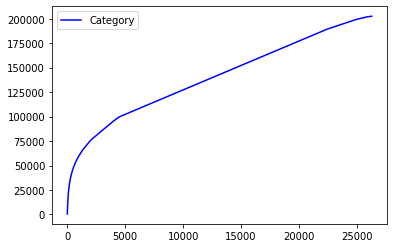

In [ ]:
figure, axes = plt.subplots()

running_total.plot(ax = axes, kind='line', color = 'blue')


Here we can see that there are approximately 200,000 questions in the data set. The graph above shows the running total of questions grouped by the category type. Based on this we can see that relatively few categories account for a disproportionate number of questions. For example, 50,000 questions are taken from only about 575 different categories. Given that there are over 25,000 unique categories we will reduce our data set to only the categories that appear the most frequently.

In [ ]:
# Select only the top 100 categories
category_type = category_type[0:100]

In [ ]:
common_categories = list(category_type.index)
## Create top lists for each round

In [ ]:
common_categories[:10]

['BEFORE & AFTER',
 'LITERATURE',
 'SCIENCE',
 'AMERICAN HISTORY',
 'POTPOURRI',
 'WORLD HISTORY',
 'HISTORY',
 'COLLEGES & UNIVERSITIES',
 'SPORTS',
 'WORD ORIGINS']

In [ ]:
common_categories

['BEFORE & AFTER',
 'LITERATURE',
 'SCIENCE',
 'AMERICAN HISTORY',
 'POTPOURRI',
 'WORLD HISTORY',
 'HISTORY',
 'COLLEGES & UNIVERSITIES',
 'SPORTS',
 'WORD ORIGINS',
 'U.S. CITIES',
 'WORLD GEOGRAPHY',
 'BODIES OF WATER',
 'ANIMALS',
 'U.S. GEOGRAPHY',
 'RELIGION',
 'BUSINESS & INDUSTRY',
 'SHAKESPEARE',
 'OPERA',
 'WORLD CAPITALS',
 'STATE CAPITALS',
 'BALLET',
 'LANGUAGES',
 'PEOPLE',
 'RHYME TIME',
 'ISLANDS',
 'TELEVISION',
 'TRANSPORTATION',
 'FICTIONAL CHARACTERS',
 'THE BIBLE',
 'ART & ARTISTS',
 'BOOKS & AUTHORS',
 'STUPID ANSWERS',
 'COMMON BONDS',
 'FOOD',
 'U.S. HISTORY',
 'ART',
 'SCIENCE & NATURE',
 'HOLIDAYS & OBSERVANCES',
 'MUSEUMS',
 '3-LETTER WORDS',
 'GEOGRAPHY',
 'POETS & POETRY',
 'QUOTATIONS',
 'ANNUAL EVENTS',
 'POP MUSIC',
 'HODGEPODGE',
 'CLASSICAL MUSIC',
 'AMERICAN LITERATURE',
 'MYTHOLOGY',
 'NONFICTION',
 'AMERICANA',
 'MUSICAL INSTRUMENTS',
 'AUTHORS',
 'WORLD CITIES',
 'THE CIVIL WAR',
 'THE MOVIES',
 'AROUND THE WORLD',
 'FOOD & DRINK',
 'MUSIC',
 '4-LE

In [ ]:
category_type[99]

133

Here we are selecting categories which are in the top 100 most common categories. The hundredth most common category has 133 questions asked from it. Since there are five questions per category, this would indicate that all of these categories have appeared at least 27 times over the years.

In [ ]:
jeopardy.head()

,Show.Number,Air.Date,Round,Category,Value,Question,Answer
0,5728,7/1/09,Double Jeopardy!,STOCK SYMBOL-IC,$400,ZZ is the snooze of a symbol for this Posturep...,Sealy
1,5339,11/22/07,Double Jeopardy!,THE SCIENCE OF LIQUOR,"$1,200",Zymurgy is the chemistry branch that deals wit...,fermentation
2,5152,1/23/07,Jeopardy!,LIP GLOSS,"$1,000",Zyderm & Zyplast are types of these injections...,collagen injections
3,4648,11/17/04,Double Jeopardy!,TOOLS OF THE TRADE,$400,Zwilling J. A. Henckels will sell the aspiring...,knives
4,4564,6/10/04,Double Jeopardy!,JUNE BUGGED,$400,"Zut! On June 22, 1815, 4 days after Waterloo, ...",abdicate


In [ ]:
reduced = jeopardy[jeopardy["Category"].isin(common_categories)]
reduced.head()

,Show.Number,Air.Date,Round,Category,Value,Question,Answer
21,6070,1/21/11,Double Jeopardy!,CLASSICAL MUSIC,$800,Zoltan Kodaly wrote some of the finer works fo...,the cello
31,6091,2/21/11,Jeopardy!,COMMON BONDS,$400,"ZIP, Morse, secret",codes
34,6192,7/12/11,Jeopardy!,WORLD HISTORY,$800,Zinoviev & Pyatakov were 2 victims of the 1930...,show trials
41,4891,12/12/05,Double Jeopardy!,MYTHOLOGY,"$2,000",Zeus was enamored of this young prince whom he...,Ganymede
48,4394,10/16/03,Jeopardy!,HOMOPHONES,$400,"Zero, or a religious sister",none/nun


In [ ]:
jeopardy['Air.Date'] = pd.to_datetime(jeopardy['Air.Date'])

In [ ]:
jeopardy.head()

,Show.Number,Air.Date,Round,Category,Value,Question,Answer
0,5728,2009-07-01,Double Jeopardy!,STOCK SYMBOL-IC,$400,ZZ is the snooze of a symbol for this Posturep...,Sealy
1,5339,2007-11-22,Double Jeopardy!,THE SCIENCE OF LIQUOR,"$1,200",Zymurgy is the chemistry branch that deals wit...,fermentation
2,5152,2007-01-23,Jeopardy!,LIP GLOSS,"$1,000",Zyderm & Zyplast are types of these injections...,collagen injections
3,4648,2004-11-17,Double Jeopardy!,TOOLS OF THE TRADE,$400,Zwilling J. A. Henckels will sell the aspiring...,knives
4,4564,2004-06-10,Double Jeopardy!,JUNE BUGGED,$400,"Zut! On June 22, 1815, 4 days after Waterloo, ...",abdicate


In [ ]:
print(reduced.shape)

(22638, 7)


In [ ]:
# Clear up memory, full data frame no longer needed
#del(jeopardy)

In [ ]:
corpus = reduced['Question'].tolist()

In [ ]:
corpus[0:2]

['Zoltan Kodaly wrote some of the finer works for solo this bass member of the violin family',
 'ZIP, Morse, secret']

#### Term Frequency Calculations for the Questions.
Which terms appear the most for questions that belong to the top 100 categories?

In [ ]:
# Term Frequency Calculations
def term_frequency(corpus):
  combined_text = []

  for doc in corpus:
    combined_text.extend(word_tokenize(doc))

  vocabulary = set(combined_text)

  tokens_to_idx = {}
  i = 0
  for token in vocabulary:
    tokens_to_idx[token] = i
    i += 1

  result = np.zeros((len(corpus), len(vocabulary)), dtype = np.int32)

  for j in range(len(corpus)): #tracks which document we are in
      doc = word_tokenize(corpus[j]) #tokenize the
      for token in doc:
          token_idx = tokens_to_idx[token]
          result[j, token_idx] += 1

  return vocabulary, result

In [ ]:
vocab, res = term_frequency(corpus)

In [ ]:
vocab = list(vocab)

In [ ]:
len(vocab)

35978

In [ ]:
res.shape

(22638, 35978)

The code above generates the term frequency calculations for the `reduced` data frame. This matrix is quite large as can be seen in the cell directly above. Further, this matrix is extremely sparce.

In [ ]:
from nltk.corpus import stopwords

stopwords_en = stopwords.words("english")

In [ ]:
import string
stopwords_en.extend(string.punctuation)
custom_stopword_list = ["``", "--", "''", "...", "'s"]
stopwords_en.extend(custom_stopword_list)

total_corpus = []
for doc in corpus:
  question_tokenized = word_tokenize(doc)
  total_corpus.append(question_tokenized)

filtered_corpus = []

for doc in total_corpus:
  for word in doc:
    if word.lower() not in stopwords_en:
      filtered_corpus.append(word)


The cell above creates a new corpus which does not contain stop words. The original corpus needed to be tokenized since it previously was one string per question.

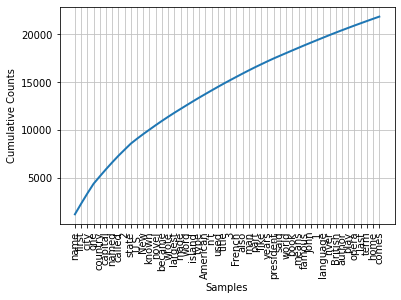

[('name', 1180), ('first', 1108), ('city', 1069), ('one', 1015), ('country', 769), ('capital', 749), ('named', 718), ('called', 691), ('2', 640), ('state', 634), ('U.S.', 511), ('New', 487), ('known', 465), ('novel', 462), ('became', 447), ('wrote', 430), ('largest', 420), ('made', 402), ('word', 401), ('island', 396), ('type', 390), ('American', 376), ("n't", 374), ('used', 368), ('title', 364), ('3', 349), ('French', 345), ('also', 342), ('man', 334), ('part', 327), ('like', 311), ('years', 310), ('president', 299), ('said', 281), ('world', 280), ('book', 278), ('means', 277), ('famous', 274), ('John', 267), ('1', 266), ('language', 264), ('river', 262), ('British', 256), ('author', 248), ('play', 246), ('opera', 243), ('last', 237), ('term', 235), ('home', 232), ('comes', 230)]


In [ ]:
fdist1 = FreqDist(filtered_corpus)
fdist1.plot(25, cumulative=False)
print(fdist1.most_common(50))

Most common terms in the common categories. Tend to due with location quesitons.

#### Answer Term Frequency
Which answers appear the most for the entire data set?

In [ ]:
common_answers = jeopardy['Answer'].value_counts()

In [ ]:
common_answers[0:20]

China           206
Australia       204
Japan           185
France          185
Chicago         182
California      178
India           174
Spain           167
Canada          164
Alaska          156
Mexico          154
Italy           153
Hawaii          149
Texas           145
Paris           143
Russia          137
Germany         137
Florida         136
South Africa    134
Ireland         132
Name: Answer, dtype: int64

In [ ]:
common_answers = list(common_answers.index)
common_answers = common_answers[0:20]

Of the twenty most common answers in the Jeopardy! dataset, we can see that all of them are proper noun locations. Predominantly, these are countries, but cities and a few states are present in the top twenty answers.

#### Dispersion plots for the most common categories.

In [ ]:
# Sort in chronological order
jeopardy.sort_values('Show.Number', inplace = True)

In [ ]:
show_cat = jeopardy.groupby(['Show.Number', 'Category']).size()

In [ ]:
show_cat = pd.DataFrame(show_cat)
# Change to data frame from series

In [ ]:
show_cat = show_cat.reset_index()
show_cat.head()
# Reset index so can use the to list function

,Show.Number,Category,0
0,1,'50'S TV,5
1,1,4-LETTER WORDS,5
2,1,ACTORS & ROLES,5
3,1,ANIMALS,5
4,1,FOREIGN CUISINE,4


In [ ]:
category = show_cat['Category'].tolist()
category[0:5]

["'50'S TV", '4-LETTER WORDS', 'ACTORS & ROLES', 'ANIMALS', 'FOREIGN CUISINE']

In [ ]:
category = nltk.Text(category)

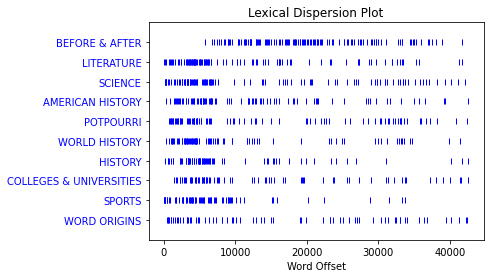

In [ ]:
category.dispersion_plot(common_categories[:10])

Above we have plotted the dispersion plots for the categories. It should be noted that the x-axis corresponds roughly to the show number, so it is fairly chronological. It appears that the early shows tended to reuse the same categories fairly frequently while the more recent ones perhaps have used different names for the categories or maybe have moved in a different direction entirely.

#### TF-IDF Scores on Questions grouped by year of air date

In [ ]:
# Group by year and combine the questions into one cell
show_groups = jeopardy.groupby(jeopardy['Air.Date'].dt.year)['Question'].unique().apply(' '.join).reset_index()

In [ ]:
# if a by show grouping is desired

#show_groups = jeopardy.groupby('Show.Number')['Question'].unique().apply(' '.join).reset_index()

In [ ]:
show_groups[0:2]

,Air.Date,Question
0,1984,She came from France to harbor America's freed...
1,1985,While poets pour over the Rhine & Danube this ...


In [ ]:
corpus2 = show_groups['Question'].tolist()

In [ ]:
corpus2[0:2]

['She came from France to harbor America\'s freedom Amount Michael Anthony gave out each week on behalf of John Beresford Tipton Close relative of the pig, though its name means "river horse" Basketball defense or Serling\'s twilight area The blonde preferred in the film "Gentlemen Prefer Blondes" When "Joshua Fit The Battle Of Jericho", these took a tumble When husbands "pop" for an ermine coat, they\'re actually buying this fur If this species of hybrid\'s parents were reversed, you\'d get a hinny It was probably a lyre, not a fiddle, if he played it while Rome burned In 1869 an American minister created this "oriental" transportation Jewish crepe filled with cheese Though its name means "city of peace", it\'s seen over 30 wars, the last in 1967 These rodents first got to America by stowing away on ships He may "Never Say Never Again" when asked to be Bond His book, translated as "My Struggle", outlined plans to conquer Europe According to 1st Timothy, it is the "root of all evil" Th

In [ ]:
print(type(corpus2))
print(type(corpus2[0]))

<class 'list'>
<class 'str'>


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def tfidf_vectorizer(corpus):
    cvect = CountVectorizer(lowercase = True, tokenizer=nltk.word_tokenize, stop_words=stopwords_en, max_features=10000)
    count_matrix = cvect.fit_transform(corpus)
    tokens = cvect.get_feature_names()

    count_matrix = pd.DataFrame(count_matrix.todense())

    df_vect = count_matrix.astype(bool).sum(axis=0)
    df_vect = np.log(len(corpus) / df_vect)

    return tokens, np.array(count_matrix * df_vect)

In [ ]:
tokens, tfidfvals = tfidf_vectorizer(corpus2)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Create vocabulary and cross reference dictonaries

# build our idx_to_token dictionary
idx_to_tokens = {}
tokens_to_idx = {}

for i in range(len(tokens)):
  token = tokens[i]
  tokens_to_idx[token] = i
  idx_to_tokens[i] = token



In [ ]:
tfidfvals.shape
# Shows the number of shows by 10,000 possible features.

(29, 10000)

The above code combines all of the questions from each show into one cell per year. These cells were treated as the documents and each show formed a corpus. The tf-idf values were then calculated.

In [ ]:
for i in range(len(corpus2)):
    idx = np.argsort(tfidfvals[i])
    idx = idx[::-1]

    print("Year: ", 1984+i)
    for j in idx[0:5]:
        print(tokens[j])
    print("\n")

Year:  1984
spiders
destination
reflection
newman
mode


Year:  1985
“
”
’
sponge
gum


Year:  1986
’
”
“
tho
besides


Year:  1987
snail
tho
spiders
dumb
bahamas


Year:  1988
ha
tho
postal
plates
scholarship


Year:  1989
”
“
1989
1st
anywhere


Year:  1990
1989
ft.
gov't
1st
nat'l


Year:  1991
’
“
”
quayle
1990


Year:  1992
1991
iroquois
1992
haakon
brussels


Year:  1993
’
“
”
1993
ringo


Year:  1994
”
“
1994
fi
mural


Year:  1995
1995
1994
half-brother
cleveland
goya


Year:  1996
1995
1996
1994
1993
marcia


Year:  1997
1996
1997
1995
1994
1993


Year:  1998
1997
1998
hi
1996
1995


Year:  1999
1998
1999
hi
1997
seen


Year:  2000
1999
hi
2000
1998
seen


Year:  2001
2000
1999
2001
hi
seen


Year:  2002
2002
2001
cheryl
clue
sofia


Year:  2003
2002
clue
cheryl
sofia
crew


Year:  2004
2003
2004
’
2002
cheryl


Year:  2005
2004
2005
2003
2002
___


Year:  2006
2006
2005
___
2004
2003


Year:  2007
2006
2007
2005
2004
2002


Year:  2008
2008
2007
2006
2005
2004


Year:  2009
2

This shows the five most important terms which appeared in quesitons for each year. Interestingly, year values, eg, 2000, appear to be quite important, especially for the most recent show years.

#### TF-IDF On answers grouped by year of air date

In [ ]:
# Performing TF-IDF on the answers
jeopardy['Answer'] = jeopardy['Answer'].astype('string')
(jeopardy.dropna(inplace = True))
yr_ans_group = jeopardy.groupby(jeopardy['Air.Date'].dt.year)['Answer'].apply(' '.join).reset_index()

In [ ]:
yr_ans_group[0:3]

,Air.Date,Answer
0,1984,the Statue of Liberty one million dollars the ...
1,1985,the Elbe aftermath Fenway Park pearls a CAT sc...
2,1986,Brazil The Bad Seed She Stoops to Conquer Nitr...


In [ ]:
corpus3 = yr_ans_group['Answer'].tolist()

In [ ]:
tokens2, tfidfvals2 = tfidf_vectorizer(corpus3)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
idx_to_tokens2 = {}
tokens_to_idx2 = {}

for i in range(len(tokens2)):
  token = tokens2[i]
  tokens_to_idx2[token] = i
  idx_to_tokens2[i] = token



In [ ]:
tfidfvals2.shape


(29, 10000)

In [ ]:
for i in range(len(corpus3)):
    idx = np.argsort(tfidfvals2[i])
    idx = idx[::-1]

    print("Year: ", 1984+i)
    for j in idx[0:5]:
      print(tokens2[j])
    print("\n")

Year:  1984
welk
pits
360
piece
confederate


Year:  1985
election
chewing
salisbury
grow
forward


Year:  1986
’
baa
crying
u.s.s.r.
glad


Year:  1987
bois
dyke
bye
'd
orient


Year:  1988
hurry
action
amanda
waters
slow


Year:  1989
terriers
flicka
diddle
zane
aurora


Year:  1990
cortez
boo
something
op
rev


Year:  1991
hostess
goody
elias
leaning
mussels


Year:  1992
romanov
demille
fay
alimony
tenzing


Year:  1993
damien
lamentations
mcpherson
semple
aimee


Year:  1994
commodore
juneau
gift
strindberg
bastille


Year:  1995
retired
antwerp
fundy
straits
muskie


Year:  1996
clinic
zsa
mt
guards
gainsborough


Year:  1997
krakow
loose
fyodor
edouard
igor


Year:  1998
none
edouard
tracks
midler
p.m.


Year:  1999
dawson
every
flanagan
3rd
things


Year:  2000
/or
every
myers
charon
vanessa


Year:  2001
racing
/or
hell
vegetable
d.


Year:  2002
seventh
blind
spiral
measure
kramer


Year:  2003
bora
final
si
action
net


Year:  2004
clinton
homeland
olmecs
visigoths
smile


Y

#### Connection between the common answers and their categories

In [ ]:

top50answer = jeopardy['Answer'].value_counts()[0:50]
top50answer


China                206
Australia            204
Japan                185
France               185
Chicago              182
California           178
India                174
Spain                167
Canada               164
Alaska               156
Mexico               154
Italy                153
Hawaii               149
Texas                145
Paris                143
Russia               137
Germany              137
Florida              136
South Africa         134
Ireland              132
Sweden               127
London               126
Brazil               125
New Orleans          122
Greece               121
Egypt                116
George Washington    115
Boston               114
Georgia              112
Ronald Reagan        112
New York             112
Thomas Jefferson     111
Abraham Lincoln      110
San Francisco        108
Switzerland          106
Norway               105
New Zealand          104
Philadelphia         104
Virginia             104
Denmark              103


In [ ]:

mask_china = jeopardy['Answer'] == 'China'
w_mask_china = jeopardy[mask_china]
w_mask_china


,Show.Number,Air.Date,Round,Category,Value,Question,Answer
180475,13,1984-09-26,Double Jeopardy!,INVENTIONS,$400,"Country credited with invention of pasta, porc...",China
188948,475,1986-10-03,Double Jeopardy!,HISTORY,"$1,000","America's ""Open Door Policy"" of the late 19th ...",China
186498,499,1986-11-06,Jeopardy!,AGRICULTURE,$300,Asian country second only to U.S. in corn prod...,China
139494,621,1987-04-27,Double Jeopardy!,NEWSPAPERS,$400,People's Almanac describes the People's Daily ...,China
124856,758,1987-12-09,Jeopardy!,GEOGRAPHY,$300,The northern part of this country was once cal...,China
...,...,...,...,...,...,...,...
26303,6172,2011-06-14,Jeopardy!,THE BALLET OF THE LAND,$800,The Central Ballet of this country has created...,China
45868,6186,2011-07-04,Double Jeopardy!,REALLY BIG COUNTRIES,$800,"Laos, Nepal & North Korea are among the 14 nat...",China
85028,6236,2011-10-31,Jeopardy!,"RICH COUNTRY, POOR COUNTRY",$400,"Among individual nations, it was the world's b...",China
53775,6264,2011-12-08,Jeopardy!,NON-ROMAN EMPERORS,$200,In the 7th century Sui Gong Di succeeded Sui Y...,China


In [ ]:
high_freq_china = w_mask_china['Category'].value_counts()
high_freq_china


HISTORY                        6
WORLD HISTORY                  4
SPACE EXPLORATION              2
THE NEW YORK TIMES BUSINESS    2
#NAME?                         2
                              ..
X MARKS THE SPOT               1
WHEN I WAS YOUR AGE            1
YOUTH IN ASIA                  1
BIG COUNTRY                    1
ARMY STRONG                    1
Name: Category, Length: 187, dtype: int64

In [ ]:
w_mask_china['Round'].value_counts()


Jeopardy!           115
Double Jeopardy!     91
Name: Round, dtype: int64

In [ ]:
high_freq_cleopatra = jeopardy[jeopardy['Answer'] == 'Cleopatra']['Category'].value_counts()
high_freq_cleopatra


SHAKESPEARE                            4
"C" IN HISTORY                         3
SHAKESPEARE'S WOMEN                    2
QUEENS                                 2
B.C. PEOPLE                            2
                                      ..
HERSTORY                               1
SHAKESPEAREAN DYING WORDS              1
EGYPTIAN ARCHAEOLOGY                   1
SHAKESPEAREAN ACTORS                   1
SHAKESPEARE CHARACTERS' DYING WORDS    1
Name: Category, Length: 81, dtype: int64

In [ ]:

high_freq_chicago = jeopardy[jeopardy['Answer'] == 'Chicago']['Category'].value_counts()
high_freq_chicago


MUSEUMS                    4
COLLEGE TOWNS              4
COLLEGES & UNIVERSITIES    3
U.S. HISTORY               2
MOVIE LOCATIONS            2
                          ..
U.S. CITY SONGS            1
U.S. SKYLINE TOURS         1
U.S. BUILDINGS             1
APRIL MAY...               1
MOVIES ON THE MAP          1
Name: Category, Length: 166, dtype: int64